In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Original Image


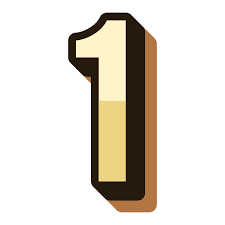

In [ ]:
# Read image
img = cv2.imread('/content/IMG.png')
print("Original Image")
cv2_imshow(img)


In [ ]:
rows, cols = img.shape[:2]
print("Rows of image : ",rows)
print("Columns of image : ",cols)

Rows of image :  225
Columns of image :  225


Translated in X direction


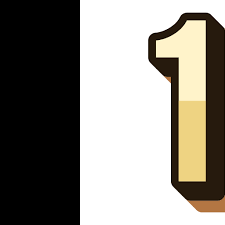

In [ ]:
# 1. TRANSLATION
# a) Shift in x direction
tx = 80
ty = 0
M = np.float32([[1, 0, tx],
                [0, 1, ty],
                [0, 0, 1]])
translated_x = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            translated_x[y, x] = img[i, j]

print("Translated in X direction")
cv2_imshow(translated_x)


Translated in Y direction


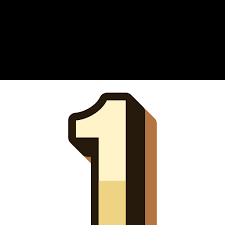

In [ ]:
# b) Shift in y direction
tx = 0
ty = 80
M = np.float32([[1, 0, tx],
                [0, 1, ty],
                [0, 0, 1]])
translated_y = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            translated_y[y, x] = img[i, j]
print("Translated in Y direction")
cv2_imshow(translated_y)


Translated in both X and Y


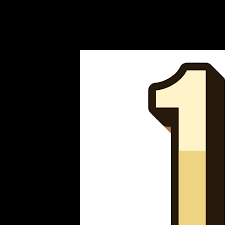

In [ ]:
# c) Shift in both x and y direction
tx = 80
ty = 50
M = np.float32([[1, 0, tx],
                [0, 1, ty],
                [0, 0, 1]])
translated_xy = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            translated_xy[y, x] = img[i, j]
print("Translated in both X and Y")
cv2_imshow(translated_xy)


Original Image


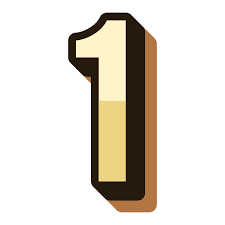

Reflected Horizontally


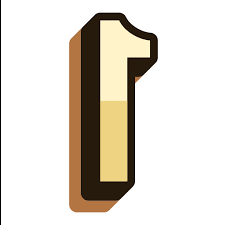

In [ ]:
# 2. REFLECTIONS
# a) Horizontal (flip left-right)
M = np.float32([[-1, 0, cols],
                [0, 1, 0],
                [0, 0, 1]])
reflect_h = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            reflect_h[y, x] = img[i, j]

print("Original Image")
cv2_imshow(img)
print("Reflected Horizontally")
cv2_imshow(reflect_h)


Reflected Vertically


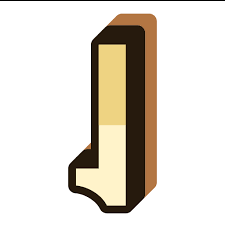

In [ ]:
# b) Vertical (flip top-bottom)
M = np.float32([[1, 0, 0],
                [0, -1, rows],
                [0, 0, 1]])
reflect_v = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            reflect_v[y, x] = img[i, j]
print("Reflected Vertically")
cv2_imshow(reflect_v)


Original Image


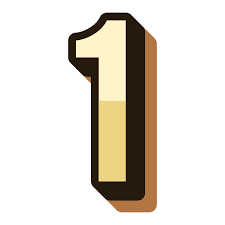

Reflected Both Axes


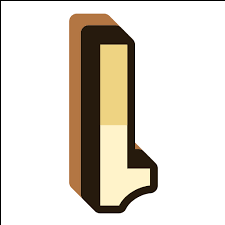

In [ ]:
# c) Both axes
M = np.float32([[-1, 0, cols],
                [0, -1, rows],
                [0, 0, 1]])
reflect_both = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            reflect_both[y, x] = img[i, j]

print("Original Image")
cv2_imshow(img)
print("Reflected Both Axes")
cv2_imshow(reflect_both)

Rotated 45° Clockwise about Origin


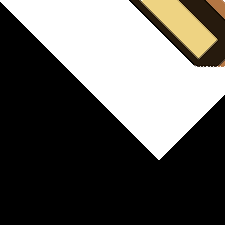

In [ ]:
# 3. ROTATION ABOUT ORIGIN (clockwise and anticlockwise)
# a) Clockwise 45 degrees
angle = np.deg2rad(45)
M = np.float32([[np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1]])
Minv = np.linalg.inv(M)  # inverse matrix

rotate_cw = np.zeros_like(img)
for y in range(rows):
    for x in range(cols):
        src = np.dot(Minv, [x, y, 1])
        j, i = int(src[0]), int(src[1])
        if 0 <= j < cols and 0 <= i < rows:
            rotate_cw[y, x] = img[i, j]

print("Rotated 45° Clockwise about Origin")
cv2_imshow(rotate_cw)


Rotated 60° Anticlockwise about Origin


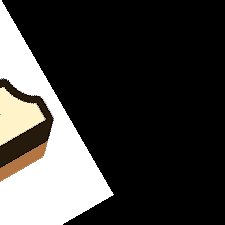

In [ ]:
# b) Anticlockwise 60 degrees
angle = np.deg2rad(60)
M = np.float32([[np.cos(angle), -np.sin(angle), 0],
                [np.sin(angle), np.cos(angle), 0],
                [0, 0, 1]])
Minv = np.linalg.inv(M)  # inverse matrix

rotate_acw = np.zeros_like(img)
for y in range(rows):
    for x in range(cols):
        src = np.dot(Minv, [x, y, 1])
        j, i = int(src[0]), int(src[1])
        if 0 <= j < cols and 0 <= i < rows:
            rotate_acw[y, x] = img[i, j]
print("Rotated 60° Anticlockwise about Origin")
cv2_imshow(rotate_acw)

Original image


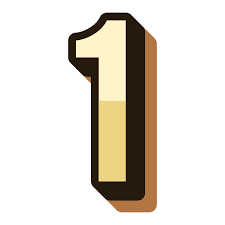

Scaled Image


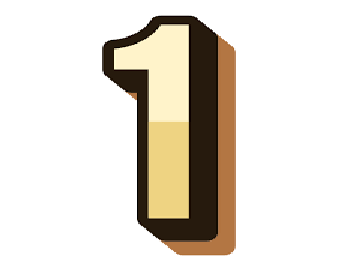

In [ ]:
# Scaling factors
sx = 1.5
sy = 1.2

# New image size
new_cols = int(cols * sx)
new_rows = int(rows * sy)

scaled = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

for y in range(new_rows):
    for x in range(new_cols):
        # Map new pixel (x,y) back to original
        old_x = int(x / sx)
        old_y = int(y / sy)

        if old_x < cols and old_y < rows:
            scaled[y, x] = img[old_y, old_x]
print("Original image")
cv2_imshow(img)
print("Scaled Image")
cv2_imshow(scaled)

Scaled Image


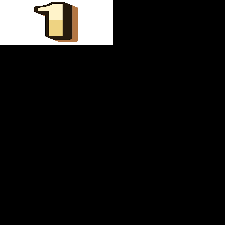

In [ ]:
# 4. SCALING
sx = 0.5
sy = 0.2
M = np.float32([[sx, 0, 0],
                [0, sy, 0],
                [0, 0, 1]])
scaled = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            scaled[y, x] = img[i, j]
print("Scaled Image")
cv2_imshow(scaled)


Sheared along X-axis


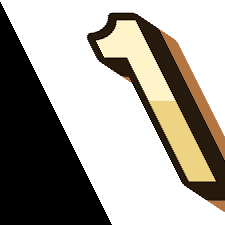

In [ ]:
# 5. SHEARING along X-axis
shx = 0.5
M = np.float32([[1, shx, 0],
                [0, 1, 0],
                [0, 0, 1]])
shear_x = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            shear_x[y, x] = img[i, j]
print("Sheared along X-axis")
cv2_imshow(shear_x)


Sheared along Y-axis


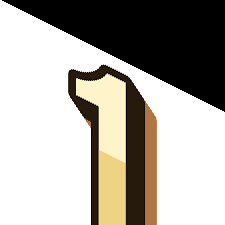

In [ ]:
# 6. SHEARING along Y-axis
shy = 0.5
M = np.float32([[1, 0, 0],
                [shy, 1, 0],
                [0, 0, 1]])
shear_y = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            shear_y[y, x] = img[i, j]
print("Sheared along Y-axis")
cv2_imshow(shear_y)


Sheared along Both Axes


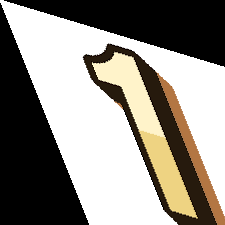

In [ ]:
# 7. SHEARING along both axes
shx = 0.4
shy = 0.3
M = np.float32([[1, shx, 0],
                [shy, 1, 0],
                [0, 0, 1]])
shear_both = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            shear_both[y, x] = img[i, j]
print("Sheared along Both Axes")
cv2_imshow(shear_both)


Combination: Scale + Rotate + Translate


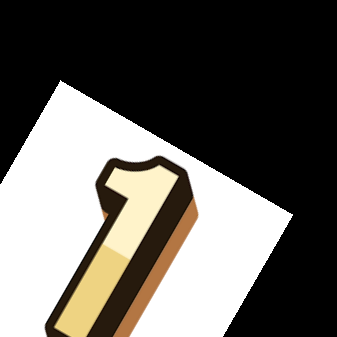

In [ ]:
# 8. COMBINATION (Scale + Rotate + Translate)
sx = 1.2
sy = 1.2
angle = np.radians(30)
tx = 60
ty = 80
M_scale = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])

M_rotate = np.float32([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle),  np.cos(angle), 0],
    [0, 0, 1]
])

M_translate = np.float32([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])


M_temp = np.dot(M_rotate, M_scale)
M_final = np.dot(M_translate, M_temp)

M_inv = np.linalg.inv(M_final)

new_rows = int(rows * 1.5)
new_cols = int(cols * 1.5)

combo = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

for y in range(new_rows):
    for x in range(new_cols):
        src = np.dot(M_inv, [x, y, 1])
        j, i = src[0], src[1]
        if 0 <= j < cols - 1 and 0 <= i < rows - 1:
            x1, y1 = int(j), int(i)
            dx, dy = j - x1, i - y1
            top = (1 - dx) * img[y1, x1] + dx * img[y1, x1 + 1]
            bottom = (1 - dx) * img[y1 + 1, x1] + dx * img[y1 + 1, x1 + 1]
            combo[y, x] = ((1 - dy) * top + dy * bottom).astype(np.uint8)

print("Combination: Scale + Rotate + Translate")
cv2_imshow(combo)


Combination 2: Shear + Reflect + Translate


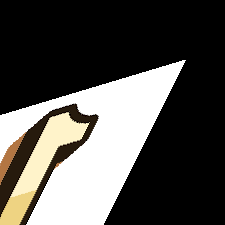

In [ ]:
#Combination 2: Shear + Reflect + Translate
shx = 0.5
shy = 0.3
tx = -40
ty = 60

M_shear = np.float32([[1, shx, 0],
                      [shy, 1, 0],
                      [0, 0, 1]])

M_reflect = np.float32([[-1, 0, cols],
                        [0, 1, 0],
                        [0, 0, 1]])

M_translate = np.float32([[1, 0, tx],
                          [0, 1, ty],
                          [0, 0, 1]])

M_temp = np.dot(M_reflect, M_shear)
M_final = np.dot(M_translate, M_temp)

combo2 = np.zeros_like(img)
for i in range(rows):
    for j in range(cols):
        vec = np.array([j, i, 1])
        new = np.dot(M_final, vec)
        x, y = int(new[0]), int(new[1])
        if 0 <= x < cols and 0 <= y < rows:
            combo2[y, x] = img[i, j]

print("Combination 2: Shear + Reflect + Translate")
cv2_imshow(combo2)

Combination 3: Scale + Shear + Rotate (anticlockwise)


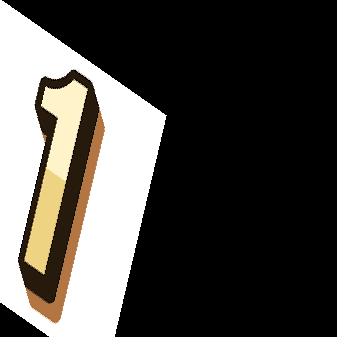

In [ ]:
#Combination 3: Scale + Shear + Rotate (anticlockwise)
sx = 0.9
sy = 1.1
shx = 0.4
angle = np.radians(35)

M_scale = np.float32([[sx, 0, 0],
                      [0, sy, 0],
                      [0, 0, 1]])

M_shear = np.float32([[1, shx, 0],
                      [0, 1, 0],
                      [0, 0, 1]])

M_rotate = np.float32([[np.cos(angle), -np.sin(angle), 0],
                       [np.sin(angle),  np.cos(angle), 0],
                       [0, 0, 1]])

M_temp = np.dot(M_shear, M_scale)
M_final = np.dot(M_rotate, M_temp)
M_inv = np.linalg.inv(M_final)

new_rows = int(rows * 1.5)
new_cols = int(cols * 1.5)

combo3 = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

for y in range(new_rows):
    for x in range(new_cols):
        src = np.dot(M_inv, [x, y, 1])
        j, i = int(src[0]), int(src[1])
        if 0 <= j < cols and 0 <= i < rows:
            combo3[y, x] = img[i, j]

print("Combination 3: Scale + Shear + Rotate (anticlockwise)")
cv2_imshow(combo3)

Combination:  Rotate + Translate


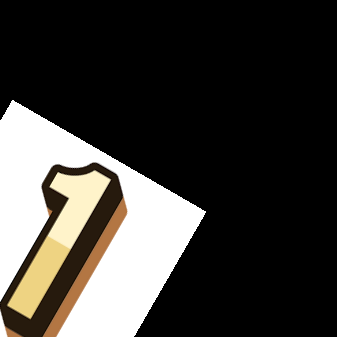

In [ ]:
# 8. COMBINATION (Rotate + Translate)

angle = np.radians(30)
tx = 60
ty = 80

M_rotate = np.float32([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle),  np.cos(angle), 0],
    [0, 0, 1]
])

M_translate = np.float32([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

M_final = np.dot(M_rotate, M_translate)

M_inv = np.linalg.inv(M_final)

new_rows = int(rows * 1.5)
new_cols = int(cols * 1.5)

combo = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

for y in range(new_rows):
    for x in range(new_cols):
        src = np.dot(M_inv, [x, y, 1])
        j, i = src[0], src[1]
        if 0 <= j < cols - 1 and 0 <= i < rows - 1:
            x1, y1 = int(j), int(i)
            dx, dy = j - x1, i - y1
            top = (1 - dx) * img[y1, x1] + dx * img[y1, x1 + 1]
            bottom = (1 - dx) * img[y1 + 1, x1] + dx * img[y1 + 1, x1 + 1]
            combo[y, x] = ((1 - dy) * top + dy * bottom).astype(np.uint8)

print("Combination:  Rotate + Translate")
cv2_imshow(combo)


Combination:  Rotate + Translate


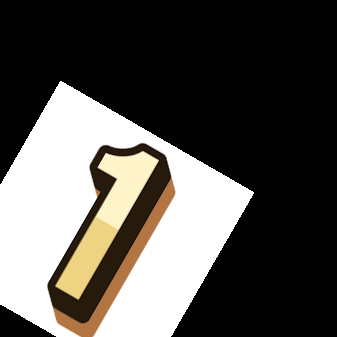

In [ ]:
# 8. COMBINATION (Rotate + Translate)

angle = np.radians(30)
tx = 60
ty = 80

M_rotate = np.float32([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle),  np.cos(angle), 0],
    [0, 0, 1]
])

M_translate = np.float32([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

M_final = np.dot(M_translate, M_rotate)

M_inv = np.linalg.inv(M_final)

new_rows = int(rows * 1.5)
new_cols = int(cols * 1.5)

combo = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

for y in range(new_rows):
    for x in range(new_cols):
        src = np.dot(M_inv, [x, y, 1])
        j, i = src[0], src[1]
        if 0 <= j < cols - 1 and 0 <= i < rows - 1:
            x1, y1 = int(j), int(i)
            dx, dy = j - x1, i - y1
            top = (1 - dx) * img[y1, x1] + dx * img[y1, x1 + 1]
            bottom = (1 - dx) * img[y1 + 1, x1] + dx * img[y1 + 1, x1 + 1]
            combo[y, x] = ((1 - dy) * top + dy * bottom).astype(np.uint8)

print("Combination: Translate + Rotate ")
cv2_imshow(combo)
